Part 1: Generate Linearly Separable Data

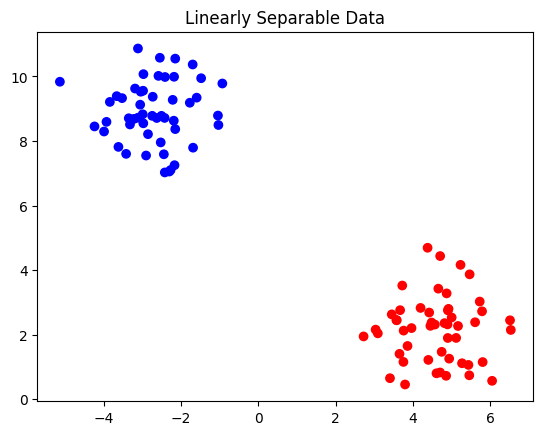

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)
y=np.where(y==0, -1, 1)
#Convert labels from {0,1} to {-1,+1}
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Linearly Separable Data")
plt.show()

In [2]:
from sklearn.svm import SVC
svm_hard=   SVC(kernel='linear', C=1e10)
svm_hard.fit(X,y)   

print("Number of support vectors", len(svm_hard.support_vectors_))

Number of support vectors 2


In [3]:
w=svm_hard.coef_[0]   #weight vector
b=svm_hard.intercept_[0]

print("w:", w)
print("b:", b)

w: [ 0.24748994 -0.17407192]
b: 0.7341550476191021


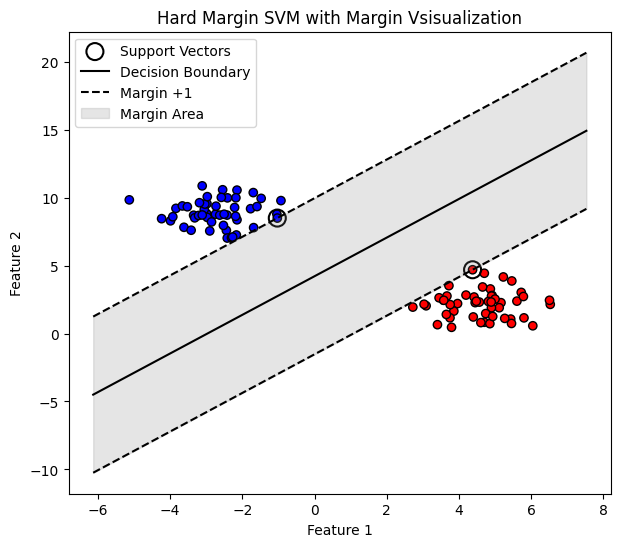

In [5]:
plt.figure(figsize=(7,6))

#Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

#Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:, 0],
    svm_hard.support_vectors_[:, 1],
    s=150,facecolors='none',edgecolors='k',linewidths=1.5,
    label='Support Vectors'
)

#Create x values for line plotting
x_values = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)

#Decision boundary: w.x+b=0
y_decision = -(w[0] * x_values + b) / w[1]

#Margin boundaries: w.x+b=±1
y_margin_pos = -(w[0] * x_values + b - 1) / w[1]
y_margin_neg = -(w[0] * x_values + b + 1) / w[1]

#Plot lines
plt.plot(x_values, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_values, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_values, y_margin_neg, 'k--')

#Shade margin area
plt.fill_between(x_values, y_margin_pos, y_margin_neg, color='gray', alpha=0.2, label="Margin Area")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard Margin SVM with Margin Vsisualization")
plt.legend()
plt.show()

## Part 3: Generate Overlapping data

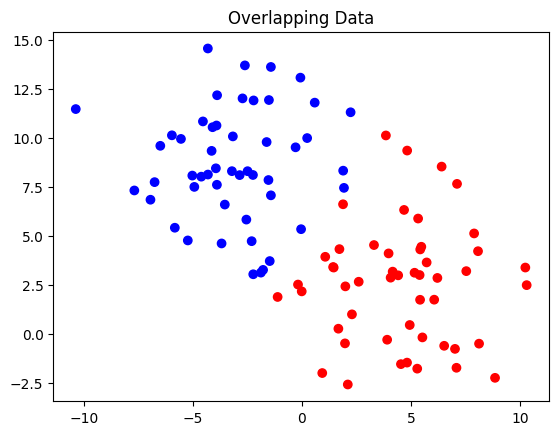

In [7]:
X_overlap, y_overlap = make_blobs(n_samples = 100, centers = 2, random_state = 42, cluster_std=3)
y_overlap = np.where(y_overlap == 0, -1, 1)

plt.scatter(X_overlap[:,0], X_overlap[:, 1], c = y_overlap, cmap = 'bwr')
plt.title("Overlapping Data")
plt.show()

In [8]:
from sklearn.svm import SVC

# Hard margin SVM (very large C)
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_overlap, y_overlap)

print("Number of support vectors:",
      len(svm_hard.support_vectors_))

Number of support vectors: 3


In [10]:
w = svm_hard.coef_[0]   #weight vector
b = svm_hard.intercept_[0] #bias

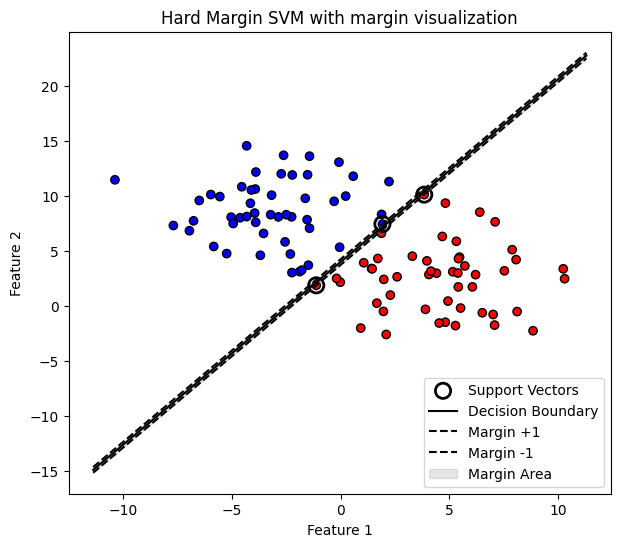

In [13]:
plt.figure(figsize=(7,6))
 
#plotting the data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, cmap='bwr', edgecolors='k')
 
#highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:, 0],
    svm_hard.support_vectors_[:, 1],
    s=120, facecolors='none', edgecolors='k', label='Support Vectors', linewidth=2)
 
#create x values for line plotting
x_vals = np.linspace(X_overlap[:, 0].min()-1, X_overlap[:, 0].max()+1, 200)
 
#decision boundary: w.x + b = 0  
y_decision = -(w[0] * x_vals + b) / w[1]
 
#margin boundaries: w.x + b = ±1
y_margin_pos = -(w[0] * x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b + 1) / w[1]
 
#plot lines
plt.plot(x_vals, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_neg, 'k--', label='Margin -1')
 
#shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
      color='gray', alpha=0.2, label='Margin Area')
 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM with margin visualization')
plt.legend()
plt.show()

In [15]:
from sklearn.svm import SVC

# Soft margin SVM
svm_soft = SVC(kernel='linear', C = 1.0)
svm_soft.fit(X_overlap, y_overlap)

print("Number of support vectors:", 
      len(svm_soft.support_vectors_))

Number of support vectors: 6


# Plot soft margin decision boundary

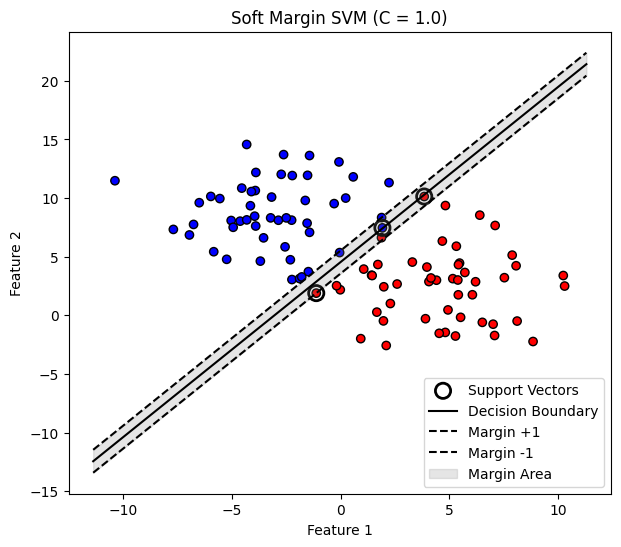

In [16]:
w_soft = svm_soft.coef_[0]   #weight vector
b_soft = svm_soft.intercept_[0] #bias

plt.figure(figsize=(7,6))
 
#plotting the data points
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, cmap='bwr', edgecolors='k')
 
#highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:, 0],
    svm_hard.support_vectors_[:, 1],
    s=120, facecolors='none', edgecolors='k', label='Support Vectors', linewidth=2)
 
#create x values for line plotting
x_vals = np.linspace(X_overlap[:, 0].min()-1, X_overlap[:, 0].max()+1, 200)
 
#decision boundary: w.x + b = 0  
y_decision = -(w_soft[0] * x_vals + b_soft) / w_soft[1]
 
#margin boundaries: w.x + b = ±1
y_margin_pos = -(w_soft[0] * x_vals + b_soft - 1) / w_soft[1]
y_margin_neg = -(w_soft[0] * x_vals + b_soft + 1) / w_soft[1]
 
#plot lines
plt.plot(x_vals, y_decision, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_neg, 'k--', label='Margin -1')
 
#shade margin area
plt.fill_between(
    x_vals, y_margin_pos, y_margin_neg,
      color='gray', alpha=0.2, label='Margin Area')
 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM (C = 1.0)')
plt.legend()
plt.show()

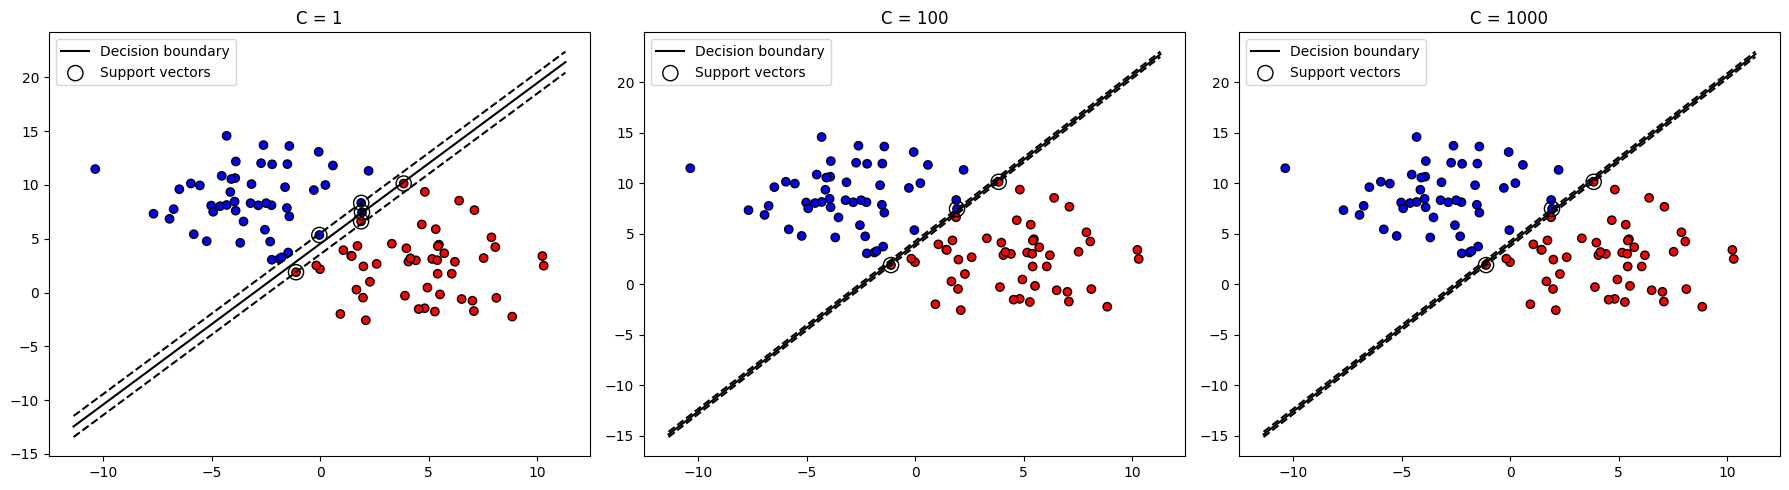

In [17]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

C_values = [1, 100, 1000]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, C in zip(axes, C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_overlap, y_overlap)

    w = svm.coef_[0]
    b = svm.intercept_[0]

    # Create decision boundary
    x_vals = np.linspace(
        X_overlap[:, 0].min() - 1,
        X_overlap[:, 0].max() + 1,
        100
    )
    y_decision = -(w[0] * x_vals + b) / w[1]
    y_margin1 = -(w[0] * x_vals + b - 1) / w[1]
    y_margin2 = -(w[0] * x_vals + b + 1) / w[1]

    # Plot points
    ax.scatter(
        X_overlap[:, 0],
        X_overlap[:, 1],
        c=y_overlap,
        cmap='bwr',
        edgecolors='k'
    )

    # Plot decision boundary & margins
    ax.plot(x_vals, y_decision, 'k-', label='Decision boundary')
    ax.plot(x_vals, y_margin1, 'k--')
    ax.plot(x_vals, y_margin2, 'k--')

    # Highlight support vectors
    ax.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=120,
        facecolors='none',
        edgecolors='k',
        label='Support vectors'
    )

    ax.set_title(f"C = {C}")
    ax.legend()

plt.tight_layout()
plt.show()
